In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print("Class labels:", np.unique(y))

Class labels: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
print("Labels counts in y:", np.bincount(y))
print("Labels counts in y_train:", np.bincount(y_train))
print("Labels counts in y_test:", np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print("Misclassed examples: %d" % (y_test != y_pred).sum())

Misclassed examples: 1


In [5]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.3f" % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [6]:
print("Accuracy: %.3f" % ppn.score(X_test_std, y_test))

Accuracy: 0.978


In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c = "none", edgecolor = "black",
                   alpha = 1.0, linewidth = 1, marker = "o", s = 100, label = "Test set")

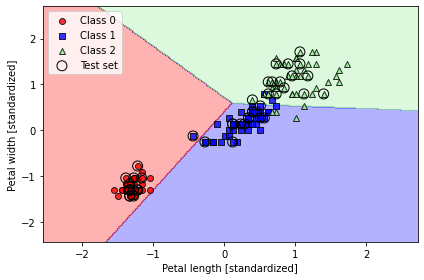

In [8]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = ppn, test_idx = range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

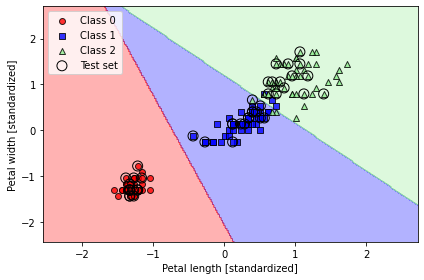

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100.0, solver = "lbfgs", multi_class = "ovr")
lr.fit(X_train_std, y_train)
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = lr, test_idx = range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

In [10]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

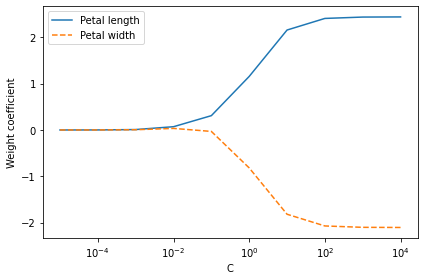

In [11]:
weights, params = [], []

for c in np.arange(-5,5):
    lr = LogisticRegression(C=10.**c, multi_class = "ovr")
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
    
weights = np.array(weights)
plt.plot(params, weights[:,0], label = "Petal length")
plt.plot(params, weights[:,1], linestyle = "--", label = "Petal width")
plt.xlabel("C")
plt.ylabel("Weight coefficient")
plt.legend(loc = "upper left")
plt.xscale("log")
plt.tight_layout()
plt.show()

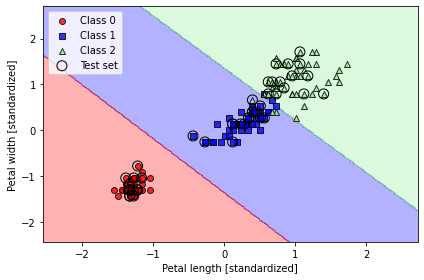

In [12]:
from sklearn.svm import SVC
svm = SVC(kernel = "linear", C = 1.0, random_state = 1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = svm, test_idx = range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

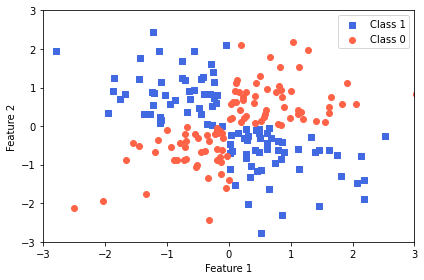

In [13]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c = "royalblue", marker = "s", label = "Class 1")
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], c = "tomato", marker = "o", label = "Class 0")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc = "upper right")
plt.tight_layout()
plt.show()

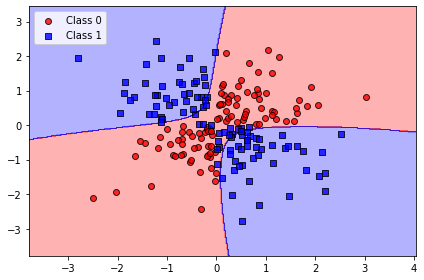

In [14]:
svm = SVC(kernel = "rbf", C = 10.0, gamma = 0.10, random_state = 1)
svm.fit(X_xor, y_xor)
plot_decision_regions(X = X_xor, y = y_xor, classifier = svm)
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

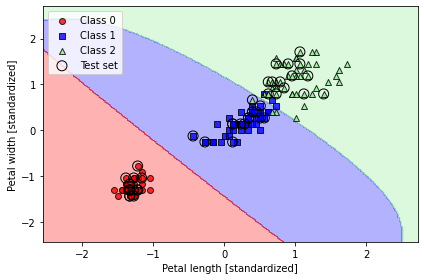

In [17]:
svm = SVC(kernel = "rbf", C = 1.0, random_state = 1, gamma = 0.2)
svm.fit(X_train_std, y_train)
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = svm, test_idx = range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

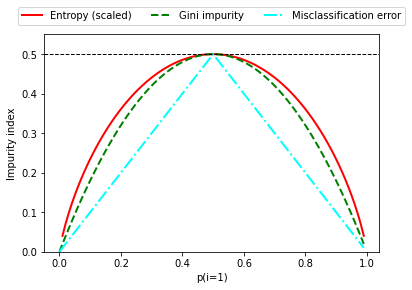

In [27]:
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2(1 - p)

def gini(p):
    return p * (1-p) + (1-p) * p

def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) / 2 if p != 0 else None for p in x]
err = [error(p) for p in x]

fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c in zip([ent, gini(x), err], ["Entropy (scaled)", "Gini impurity", "Misclassification error"], 
                        ["-", "--", "-."], 
                        ["red", "green", "cyan"]):
    line = ax.plot(x, i, label = lab, linestyle = ls, lw =2, color = c)
    
ax.legend(loc = "upper center", bbox_to_anchor = (0.5, 1.15), ncol = 5, fancybox = True, shadow = False)
ax.axhline(y = 0.5, linewidth = 1, color = "k", linestyle = "--")
plt.ylim([0,0.55])
plt.ylabel("Impurity index")
plt.xlabel("p(i=1)")
plt.show()

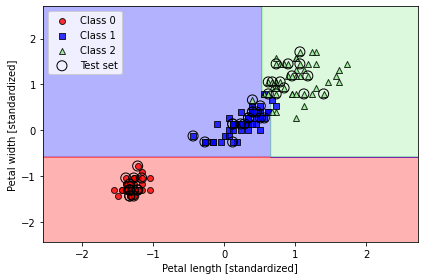

In [30]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion = "gini", max_depth = 4, random_state = 1)
tree_model.fit(X_train_std, y_train)
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = tree_model, test_idx = range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

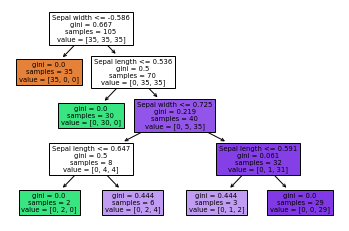

In [32]:
from sklearn import tree
feature_names = ["Sepal length","Sepal width", "Petal length", "Peatal width"]
tree.plot_tree(tree_model, feature_names = feature_names, filled = True)
plt.show()